In [24]:
import pandas as pd
import datetime
import quandl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from datetime import datetime
%matplotlib inline

# Enter your quandl API key here
# quandl.ApiConfig.api_key = open("quandl_code", "r").read()

/home/uzumaki/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [29]:
# set default size for plots
matplotlib.rcParams['figure.figsize'] = (16, 8)

In [3]:
# Grab eur/usd prices
eur_usd = quandl.get("ECB/EURUSD")

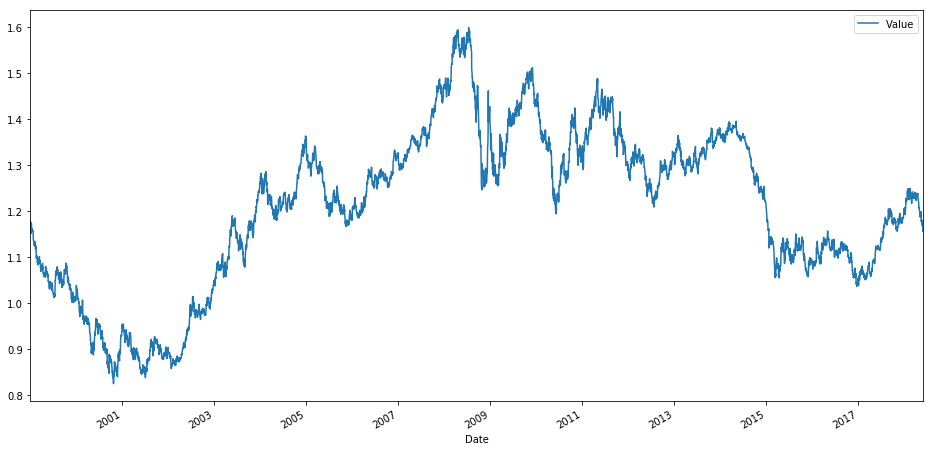

In [4]:
eur_usd.plot();

In [5]:
eur_usd = pd.read_csv("EURUSD.csv")

In [6]:
eur_usd = eur_usd.iloc[:800]

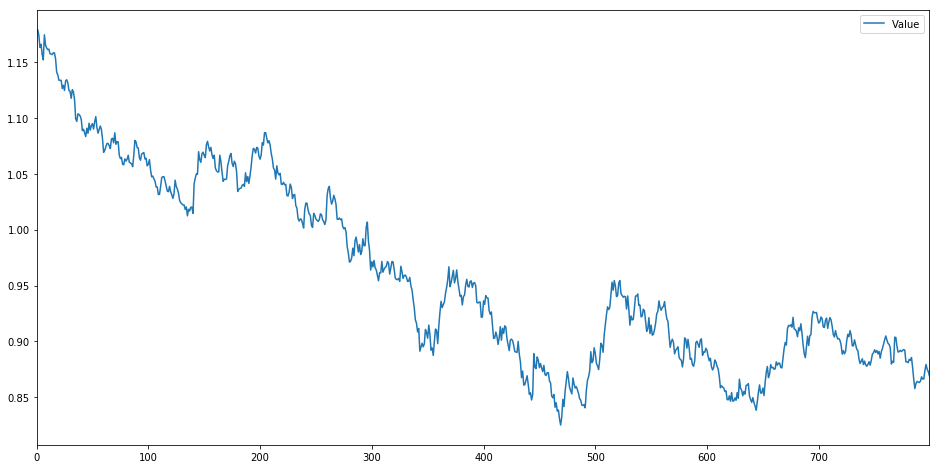

In [7]:
eur_usd.plot();

## Simple Moving Average on EUR/USD

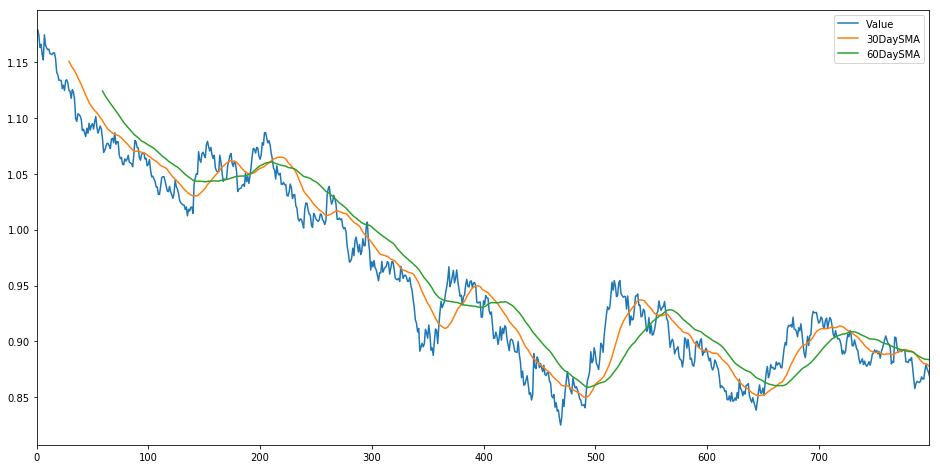

In [16]:
eur_usd["30DaySMA"] = eur_usd["Value"].rolling(window=30).mean()
eur_usd["60DaySMA"] = eur_usd["Value"].rolling(window=60).mean()
eur_usd[["Value", "30DaySMA", "60DaySMA"]].plot();

## Exponentially Moving Average on EUR/USD

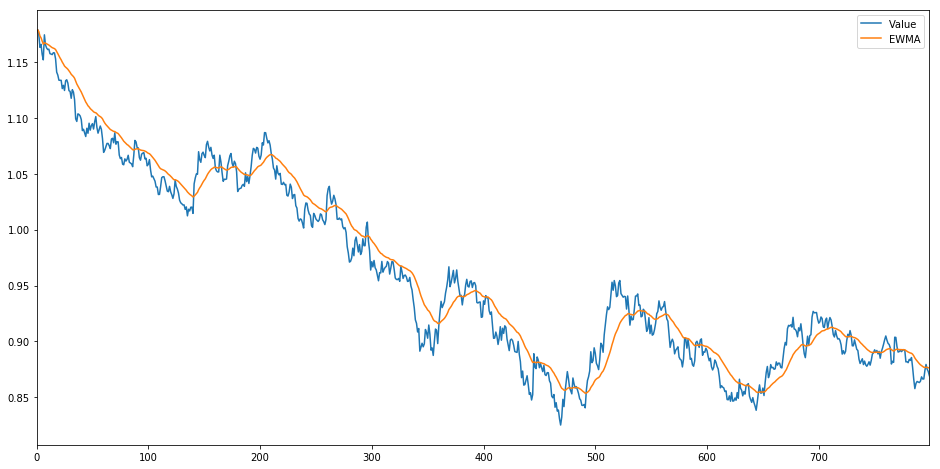

In [17]:
eur_usd["EWMA"] = eur_usd["Value"].ewm(span=30).mean()
eur_usd[["Value", "EWMA"]].plot();

## Bollinger Bands

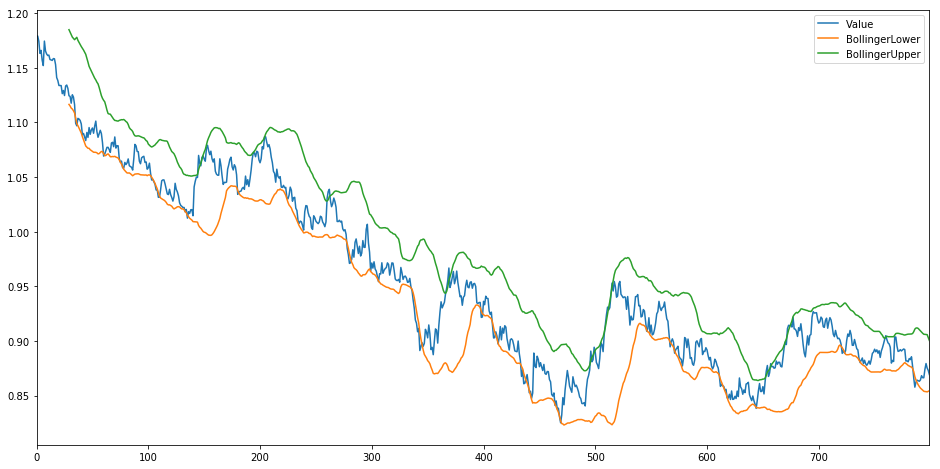

In [21]:
eur_usd["BollingerLower"] = eur_usd["30DaySMA"] - 2 * eur_usd["Value"].rolling(30).std()
eur_usd["BollingerUpper"] = eur_usd["30DaySMA"] + 2 * eur_usd["Value"].rolling(30).std()
eur_usd[["Value", "BollingerLower", "BollingerUpper"]].plot();

## HP Filter

In [25]:
cycle, trend = sm.tsa.filters.hpfilter(eur_usd["Value"])

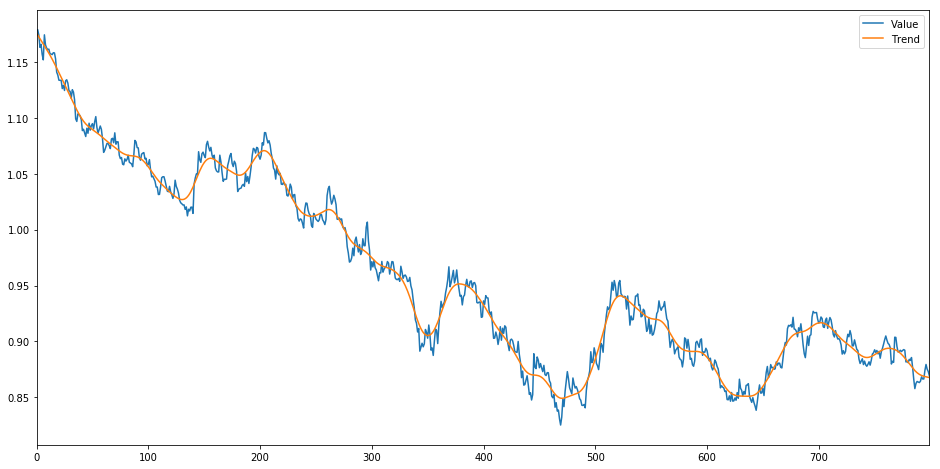

In [34]:
eur_usd[["Value"]].plot()
fig = trend.plot(label="Trend")
fig.legend();